In [107]:
from utg import create_graph, utils
from orderbike import plot, growth
import json
import os

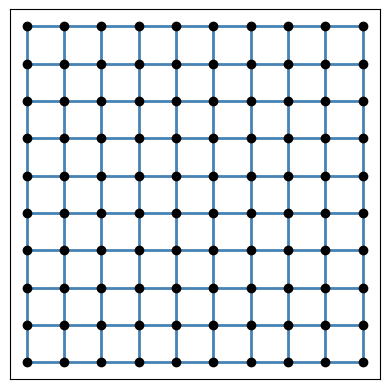

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [108]:
G = create_graph.create_grid_graph(rows=10, cols=10, width=100, diagonal=False)
utils.plot_graph(G)

In [109]:
print(f"Node 0 is {G.nodes[0]}, Node 1 is {G.nodes[1]}, Node 10 is {G.nodes[10]}.")

Node 0 is {'x': 0, 'y': 0}, Node 1 is {'x': 0, 'y': 100}, Node 10 is {'x': 100, 'y': 0}.


You need to add 1 to go up, add 10 to go right !

In [110]:
manual_order = []
# manual_order.append((43, 53))
manual_order.append((33, 43))
manual_order.append((53, 63))

manual_order.append((63, 64))
manual_order.append((33, 34))
manual_order.append((64, 65))
manual_order.append((34, 35))
manual_order.append((65, 66))
manual_order.append((35, 36))

manual_order.append((36, 46))
manual_order.append((56, 66))
manual_order.append((46, 56))

manual_order.append((63, 73))
manual_order.append((73, 83))
manual_order.append((83, 93))

manual_order.append((26, 36))
manual_order.append((16, 26))
manual_order.append((6, 16))

manual_order.append((32, 33))
manual_order.append((31, 32))
manual_order.append((30, 31))

manual_order.append((66, 67))
manual_order.append((67, 68))
manual_order.append((68, 69))

manual_order.append((66, 76))
manual_order.append((76, 86))
manual_order.append((86, 96))

manual_order.append((62, 63))
manual_order.append((61, 62))
manual_order.append((60, 61))

manual_order.append((23, 33))
manual_order.append((13, 23))
manual_order.append((3, 13))

manual_order.append((36, 37))
manual_order.append((37, 38))
manual_order.append((38, 39))

manual_order.append((93, 94))
manual_order.append((94, 95))
manual_order.append((95, 96))

manual_order.append((3, 4))
manual_order.append((4, 5))
manual_order.append((5, 6))

manual_order.append((30, 40))
manual_order.append((40, 50))
manual_order.append((50, 60))

manual_order.append((39, 49))
manual_order.append((49, 59))
manual_order.append((59, 69))

manual_order.append((60, 70))
manual_order.append((70, 80))
manual_order.append((80, 90))

manual_order.append((6, 7))
manual_order.append((7, 8))
manual_order.append((8, 9))

manual_order.append((69, 79))
manual_order.append((79, 89))
manual_order.append((89, 99))

manual_order.append((20, 30))
manual_order.append((10, 20))
manual_order.append((0, 10))

manual_order.append((90, 91))
manual_order.append((91, 92))
manual_order.append((92, 93))

manual_order.append((9, 19))
manual_order.append((19, 29))
manual_order.append((29, 39))

manual_order.append((2, 3))
manual_order.append((1, 2))
manual_order.append((0, 1))

manual_order.append((96, 97))
manual_order.append((97, 98))
manual_order.append((98, 99))

manual_order.append((32, 42))
manual_order.append((42, 52))
manual_order.append((52, 62))

manual_order.append((73, 74))
manual_order.append((74, 75))
manual_order.append((75, 76))

manual_order.append((57, 67))
manual_order.append((47, 57))
manual_order.append((37, 47))

manual_order.append((23, 24))
manual_order.append((24, 25))
manual_order.append((25, 26))

manual_order.append((22, 23))
manual_order.append((22, 32))

manual_order.append((67, 77))
manual_order.append((76, 77))

manual_order.append((26, 27))
manual_order.append((27, 37))

manual_order.append((62, 72))
manual_order.append((72, 73))

manual_order.append((25, 35))
manual_order.append((35, 45))

manual_order.append((45, 55))
manual_order.append((55, 65))
manual_order.append((65, 75))

manual_order.append((52, 53))
manual_order.append((53, 54))
manual_order.append((54, 55))
manual_order.append((55, 56))
manual_order.append((56, 57))

manual_order.append((21, 22))
manual_order.append((20, 21))

manual_order.append((7, 17))
manual_order.append((17, 27))

manual_order.append((72, 82))
manual_order.append((82, 92))

manual_order.append((71, 72))
manual_order.append((70, 71))

manual_order.append((12, 22))
manual_order.append((2, 12))

manual_order.append((27, 28))
manual_order.append((28, 29))

manual_order.append((77, 87))
manual_order.append((87, 97))

manual_order.append((77, 78))
manual_order.append((78, 79))

manual_order.append((24, 34))
manual_order.append((42, 43))
manual_order.append((43, 44))
manual_order.append((34, 44))
manual_order.append((44, 45))
manual_order.append((45, 46))
manual_order.append((46, 47))
manual_order.append((44, 54))
manual_order.append((54, 64))
manual_order.append((64, 74))

manual_order.append((21, 31))
manual_order.append((31, 41))
manual_order.append((41, 51))
manual_order.append((51, 61))
manual_order.append((61, 71))

manual_order.append((28, 38))
manual_order.append((38, 48))
manual_order.append((48, 58))
manual_order.append((58, 68))
manual_order.append((68, 78))

manual_order.append((12, 13))
manual_order.append((13, 14))
manual_order.append((14, 15))
manual_order.append((15, 16))
manual_order.append((16, 17))

manual_order.append((82, 83))
manual_order.append((83, 84))
manual_order.append((84, 85))
manual_order.append((85, 86))
manual_order.append((86, 87))
manual_order.append((87, 88))

manual_order.append((78, 88))

manual_order.append((11, 21))
manual_order.append((11, 12))
manual_order.append((17, 18))

manual_order.append((18, 28))

manual_order.append((71, 81))
manual_order.append((81, 82))

manual_order.append((40, 41))
manual_order.append((41, 42))

manual_order.append((74, 84))
manual_order.append((84, 94))

manual_order.append((57, 58))
manual_order.append((58, 59))

manual_order.append((15, 25))
manual_order.append((5, 15))

manual_order.append((51, 52))
manual_order.append((50, 51))

manual_order.append((75, 85))
manual_order.append((85, 95))

manual_order.append((14, 24))
manual_order.append((4, 14))

manual_order.append((47, 48))
manual_order.append((48, 49))

manual_order.append((81, 91))
manual_order.append((88, 89))
manual_order.append((8, 18))
manual_order.append((10, 11))
manual_order.append((80, 81))
manual_order.append((18, 19))
manual_order.append((88, 98))
manual_order.append((1, 11))

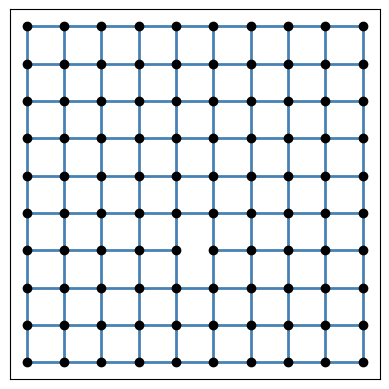

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [111]:
utils.plot_graph(G.edge_subgraph(manual_order))

In [112]:
foldername = (
    "../data/processed/ignored_files/utg_grid_trials/manually_made_order/first_manual"
)

In [113]:
foldergrowth = foldername + "/growth"
if not os.path.exists(foldergrowth):
    os.makedirs(foldergrowth)
plot.plot_growth(
    G,
    manual_order,
    foldergrowth,
    built=False,
    color_built="firebrick",
    color_added="steelblue",
    color_newest="darkgreen",
    node_size=8,
)

In [117]:
plot.make_growth_video(foldergrowth, foldergrowth + "/growth_video.mp4", fps=3)

In [118]:
with open(foldername + "/order_growth.json", "w") as f:
    json.dump(manual_order, f)

In [115]:
metrics_dict = growth.compute_metrics(G, manual_order, built=False, buff_size=152)
with open(foldername + "/metrics_growth.json", "w") as f:
    json.dump(metrics_dict, f)

In [116]:
foldergrowth_buff = foldername + "/growth_buffer"
if not os.path.exists(foldergrowth_buff):
    os.makedirs(foldergrowth_buff)
plot.plot_growth(
    G,
    manual_order,
    foldergrowth_buff,
    built=False,
    color_built="firebrick",
    color_added="steelblue",
    color_newest="darkgreen",
    node_size=8,
    buffer=True,
    plot_metrics=True,
    growth_cov=metrics_dict["coverage"],
    growth_xx=metrics_dict["xx"],
    growth_dir=metrics_dict["directness"],
    growth_reldir=metrics_dict["relative_directness"],
)

In [119]:
plot.make_growth_video(
    foldergrowth_buff, foldergrowth_buff + "/growth_video.mp4", fps=3
)